<a href="https://colab.research.google.com/github/sviteribuben/Pet_projects/blob/master/innoscripta_com_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Necessary import

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

In [ ]:
# Merged data from the multiple *.html files
data = pd.read_html('/content/drive/MyDrive/Colab Notebooks/TEST/MergeResult_2021_07_21_09_45_17.html')

*Next step - collect and clear data for each client*

##Uckerfelde OT Hohengüstow

In [ ]:
# Pattern to ACTIVA
Aktiva = pd.DataFrame(data[1])['Aktiva']
Aktiva.rename(columns={"Unnamed: 0_level_1": "bilanz",\
                       "31.12.2017 EUR": "finish",\
                       "31.12.2016 EUR": "start"}, inplace=True)
# type conversion
Aktiva['start'] = Aktiva['start'].str.replace('.', '').astype(int) / 100
Aktiva['finish'] = Aktiva['finish'].str.replace('.', '').astype(int) / 100
# Add column difference
Aktiva['difference'] = Aktiva.finish - Aktiva.start
Aktiva

,bilanz,finish,start,difference
0,A. Anlagevermögen,2420157.47,2305804.08,114353.39
1,I. Immaterielle Vermögensgegenstände,2.00,2.00,0.00
2,II. Sachanlagen,2282959.63,2166490.97,116468.66
3,III. Finanzanlagen,137195.84,91771.11,45424.73
4,B. Tiervermögen,0.00,47540.00,-47540.00
5,C. Umlaufvermögen,2225233.91,2174299.14,50934.77
6,I. Vorräte,439637.21,693370.44,-253733.23
7,II. Forderungen und sonstige Vermögensgegenstände,56315.68,201918.10,-145602.42
8,"III. Kassenbestand, Bundesbankguthaben, Guthab...",1729281.02,1279010.60,450270.42
9,D. Rechnungsabgrenzungsposten,24710.70,17496.83,7213.87


In [ ]:
# Pattern to PASSIVA
Passiva = pd.DataFrame(data[2])['Passiva']
Passiva.rename(columns={"Unnamed: 0_level_1": "bilanz",\
                       "31.12.2017 EUR": "finish",\
                       "31.12.2016 EUR": "start"}, inplace=True)
# type conversion
Passiva['start'] = Passiva['start'].str.replace('.', '').astype(int) / 100
Passiva['finish'] = Passiva['finish'].str.replace('.', '').astype(int) / 100
# Add column difference 
Passiva['difference'] = Passiva.finish - Passiva.start
Passiva

,bilanz,finish,start,difference
0,A. Eigenkapital,3576454.94,3497628.99,78825.95
1,I. gezeichnetes Kapital / Kapitalkonto/ Kapita...,49459.00,49459.00,0.00
2,II. Kapitalrücklage,198815.85,198815.85,0.00
3,III. Gewinnrücklagen/Ergebnisrücklagen,452457.15,452457.15,0.00
4,IV. Gewinnvortrag,2771896.99,2506138.51,265758.48
5,V. Jahresüberschuss,103825.95,290758.48,-186932.53
6,B. Sonderposten mit Rücklageanteil,8325.00,9711.00,-1386.00
7,C. Einlagen stiller Gesellschafter,317467.83,358369.83,-40902.00
8,D. Rückstellungen,290871.61,235079.61,55792.00
9,E. Verbindlichkeiten,456754.70,396810.62,59944.08


In [ ]:
df_concat = pd.concat([Aktiva, Passiva])
df_concat

,bilanz,finish,start,difference
0,A. Anlagevermögen,2420157.47,2305804.08,114353.39
1,I. Immaterielle Vermögensgegenstände,2.00,2.00,0.00
2,II. Sachanlagen,2282959.63,2166490.97,116468.66
3,III. Finanzanlagen,137195.84,91771.11,45424.73
4,B. Tiervermögen,0.00,47540.00,-47540.00
5,C. Umlaufvermögen,2225233.91,2174299.14,50934.77
6,I. Vorräte,439637.21,693370.44,-253733.23
7,II. Forderungen und sonstige Vermögensgegenstände,56315.68,201918.10,-145602.42
8,"III. Kassenbestand, Bundesbankguthaben, Guthab...",1729281.02,1279010.60,450270.42
9,D. Rechnungsabgrenzungsposten,24710.70,17496.83,7213.87


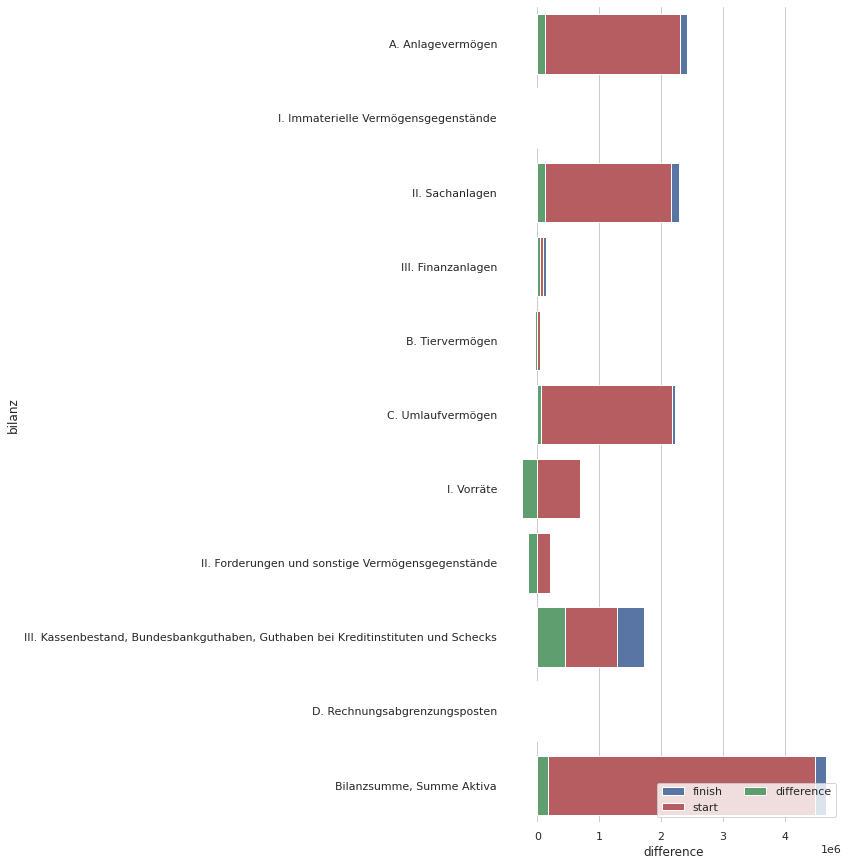

In [ ]:
# Plotting
# Initialize the matplotlib figure
# If necessary. We can log values to flatten plots. 
f, ax = plt.subplots(figsize=(6, 15))
sns.set_theme(style="whitegrid")
sns.barplot(x="finish", y="bilanz", data=Aktiva,
            label="finish", color="b")
sns.barplot(x="start", y="bilanz", data=Aktiva,
            label="start", color="r")
sns.barplot(x="difference", y="bilanz", data=Aktiva,
            label="difference", color="g")
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

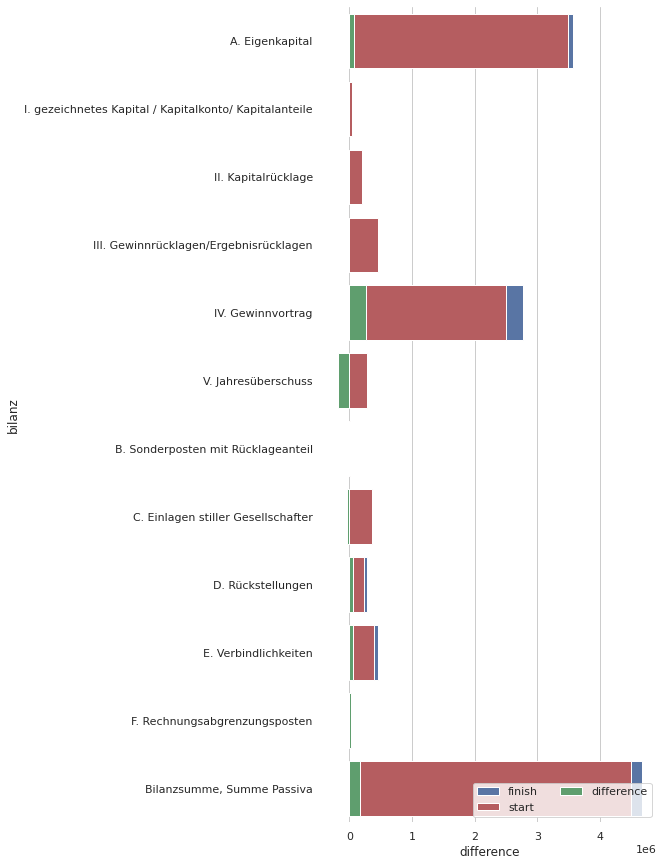

In [ ]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="finish", y="bilanz", data=Passiva,
            label="finish", color="b")
sns.barplot(x="start", y="bilanz", data=Passiva,
            label="start", color="r")
sns.barplot(x="difference", y="bilanz", data=Passiva,
            label="difference", color="g")
ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(10, 24), ylabel="",
#        xlabel="bialanz")
sns.despine(left=True, bottom=True)

##Aachen

In [ ]:
Aktiva = pd.DataFrame(data[4])['Aktiva']
Aktiva.rename(columns={"Unnamed: 0_level_1": "bilanz",\
                       "31.12.2012 EUR": "finish",\
                       "31.12.2011 EUR": "start"}, inplace=True)
# type conversion
Aktiva['start'] = Aktiva['start'].str.replace('.', '').astype(int) / 100
Aktiva['finish'] = Aktiva['finish'].str.replace('.', '').astype(int) / 100
# Add column difference
Aktiva['difference'] = Aktiva.finish - Aktiva.start
Aktiva

,bilanz,finish,start,difference
0,A. Anlagevermögen,89685.00,124519.00,-34834.00
1,I. Immaterielle Vermögensgegenstände,4949.00,9107.00,-4158.00
2,II. Sachanlagen,84734.00,115410.00,-30676.00
3,III. Finanzanlagen,2.00,2.00,0.00
4,B. Umlaufvermögen,3841104.57,3075895.48,765209.09
5,I. Vorräte,2650250.00,2596244.00,54006.00
6,II. Forderungen und sonstige Vermögensgegenstände,394257.16,221744.39,172512.77
7,davon mit einer Restlaufzeit von mehr als eine...,3096.48,13365.53,-10269.05
8,"III. Kassenbestand, Bundesbankguthaben, Guthab...",796597.41,257907.09,538690.32
9,C. Rechnungsabgrenzungsposten,8914.42,3197.44,5716.98


In [ ]:
Passiva = pd.DataFrame(data[5])['Passiva']
Passiva.rename(columns={"Unnamed: 0_level_1": "bilanz",\
                       "31.12.2012 EUR": "finish",\
                       "31.12.2011 EUR": "start"}, inplace=True)
# type conversion
Passiva['start'] = Passiva['start'].str.replace('.', '').astype(int) / 100
Passiva['finish'] = Passiva['finish'].str.replace('.', '').astype(int) / 100
# Add column difference 
Passiva['difference'] = Passiva.finish - Passiva.start
Passiva

,bilanz,finish,start,difference
0,A. Eigenkapital,578623.35,190960.45,387662.90
1,I. gezeichnetes Kapital,75000.00,75000.00,0.00
2,II. Kapitalrücklage,32710.86,32710.86,0.00
3,III. Gewinnvortrag,23249.59,20832.11,2417.48
4,IV. Jahresüberschuss,447662.90,62417.48,385245.42
5,B. Rückstellungen,375836.52,201270.00,174566.52
6,C. Verbindlichkeiten,2985244.12,2811381.47,173862.65
7,davon mit Restlaufzeit bis 1 Jahr,2982172.22,2808235.67,173936.55
8,"Bilanzsumme, Summe Passiva",3939703.99,3203611.92,736092.07


In [ ]:
df_concat = pd.concat([Aktiva, Passiva])
df_concat

,bilanz,finish,start,difference
0,A. Anlagevermögen,89685.00,124519.00,-34834.00
1,I. Immaterielle Vermögensgegenstände,4949.00,9107.00,-4158.00
2,II. Sachanlagen,84734.00,115410.00,-30676.00
3,III. Finanzanlagen,2.00,2.00,0.00
4,B. Umlaufvermögen,3841104.57,3075895.48,765209.09
5,I. Vorräte,2650250.00,2596244.00,54006.00
6,II. Forderungen und sonstige Vermögensgegenstände,394257.16,221744.39,172512.77
7,davon mit einer Restlaufzeit von mehr als eine...,3096.48,13365.53,-10269.05
8,"III. Kassenbestand, Bundesbankguthaben, Guthab...",796597.41,257907.09,538690.32
9,C. Rechnungsabgrenzungsposten,8914.42,3197.44,5716.98


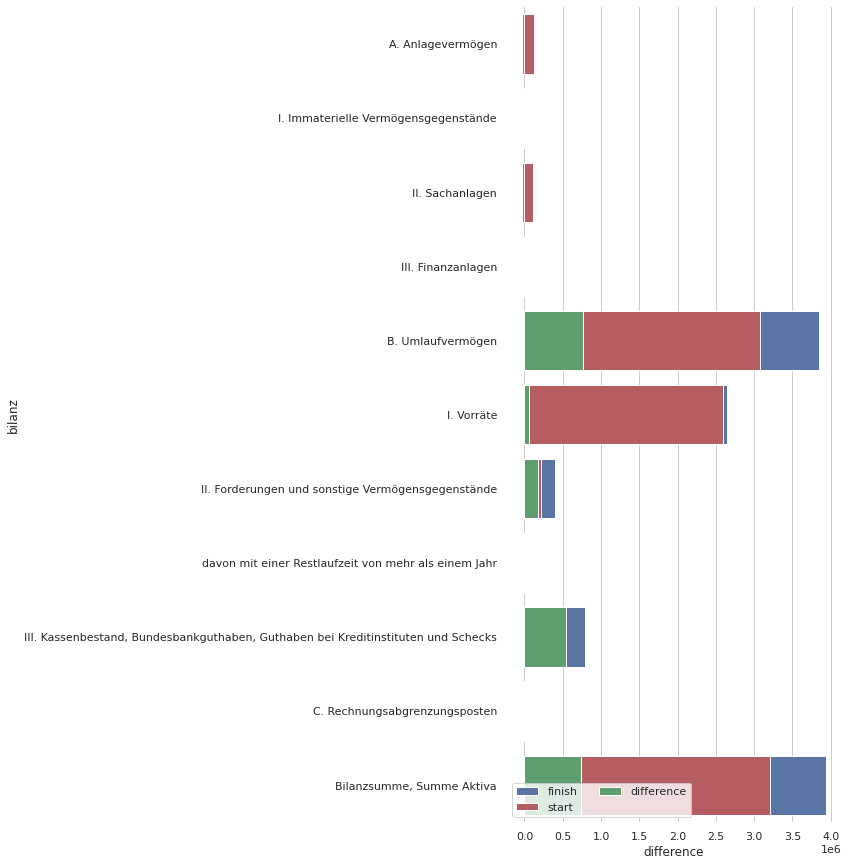

In [ ]:
# Plotting
# Initialize the matplotlib figure
# If necessary. We can log values to flatten plots. 
f, ax = plt.subplots(figsize=(6, 15))
sns.set_theme(style="whitegrid")
sns.barplot(x="finish", y="bilanz", data=Aktiva,
            label="finish", color="b")
sns.barplot(x="start", y="bilanz", data=Aktiva,
            label="start", color="r")
sns.barplot(x="difference", y="bilanz", data=Aktiva,
            label="difference", color="g")
ax.legend(ncol=2, loc="lower left", frameon=True)
sns.despine(left=True, bottom=True)

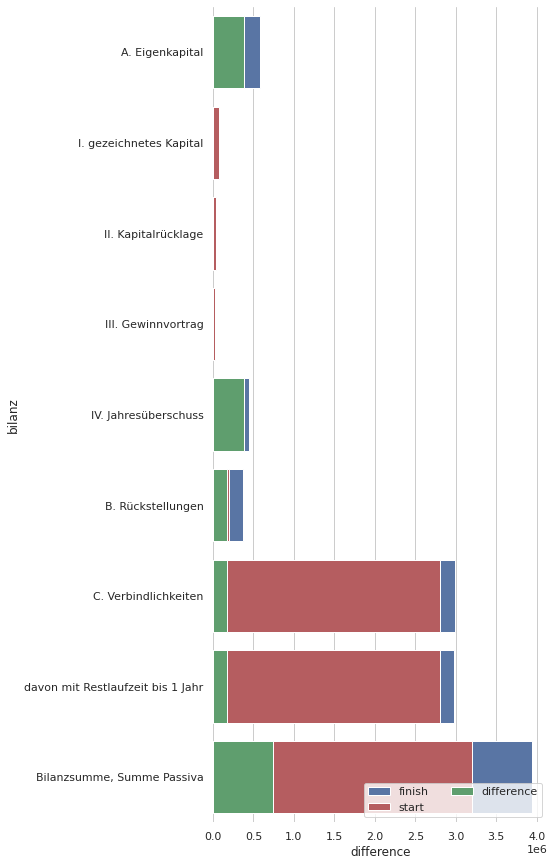

In [ ]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="finish", y="bilanz", data=Passiva,
            label="finish", color="b")
sns.barplot(x="start", y="bilanz", data=Passiva,
            label="start", color="r")
sns.barplot(x="difference", y="bilanz", data=Passiva,
            label="difference", color="g")
ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(10, 24), ylabel="",
#        xlabel="bialanz")
sns.despine(left=True, bottom=True)

##Hoyerswerda

In [ ]:
Aktiva = pd.DataFrame(data[7])['Aktiva']
Aktiva.rename(columns={"Unnamed: 0_level_1": "bilanz",\
                       "31.7.2017 EUR": "finish",\
                       "31.7.2016 EUR": "start"}, inplace=True)
# type conversion
Aktiva['start'] = Aktiva['start'].str.replace('.', '').astype(int) / 100
Aktiva['finish'] = Aktiva['finish'].str.replace('.', '').astype(int) / 100
# Add column difference
Aktiva['difference'] = Aktiva.finish - Aktiva.start
Aktiva

,bilanz,finish,start,difference
0,A. Anlagevermögen,11040.00,14244.00,-3204.00
1,I. Sachanlagen,11040.00,14244.00,-3204.00
2,B. Umlaufvermögen,2209809.27,1466478.64,743330.63
3,I. Vorräte,898406.47,407304.49,491101.98
4,II. Forderungen und sonstige Vermögensgegenstände,550876.64,438664.27,112212.37
5,"III. Kassenbestand, Bundesbankguthaben, Guthab...",760526.16,620509.88,140016.28
6,C. Rechnungsabgrenzungsposten,7466.81,7725.47,-258.66
7,Summe Aktiva,2228316.08,1488448.11,739867.97


In [ ]:
Passiva = pd.DataFrame(data[8])['Passiva']
Passiva.rename(columns={"Unnamed: 0_level_1": "bilanz",\
                       "31.7.2017 EUR": "finish",\
                       "31.7.2016 EUR": "start"}, inplace=True)
# type conversion
Passiva['start'] = Passiva['start'].str.replace('.', '').astype(int) / 100
Passiva['finish'] = Passiva['finish'].str.replace('.', '').astype(int) / 100
# Add column difference 
Passiva['difference'] = Passiva.finish - Passiva.start
Passiva

,bilanz,finish,start,difference
0,A. Eigenkapital,1066256.69,830683.93,235572.76
1,I. gezeichnetes Kapital,25000.00,25000.00,0.00
2,II. Gewinnvortrag,805683.93,735582.56,70101.37
3,III. Jahresüberschuss,235572.76,70101.37,165471.39
4,B. Rückstellungen,113044.31,57946.09,55098.22
5,C. Verbindlichkeiten,1049015.08,599818.09,449196.99
6,Summe Passiva,2228316.08,1488448.11,739867.97


In [ ]:
df_concat = pd.concat([Aktiva, Passiva])
df_concat

,bilanz,finish,start,difference
0,A. Anlagevermögen,11040.00,14244.00,-3204.00
1,I. Sachanlagen,11040.00,14244.00,-3204.00
2,B. Umlaufvermögen,2209809.27,1466478.64,743330.63
3,I. Vorräte,898406.47,407304.49,491101.98
4,II. Forderungen und sonstige Vermögensgegenstände,550876.64,438664.27,112212.37
5,"III. Kassenbestand, Bundesbankguthaben, Guthab...",760526.16,620509.88,140016.28
6,C. Rechnungsabgrenzungsposten,7466.81,7725.47,-258.66
7,Summe Aktiva,2228316.08,1488448.11,739867.97
0,A. Eigenkapital,1066256.69,830683.93,235572.76
1,I. gezeichnetes Kapital,25000.00,25000.00,0.00


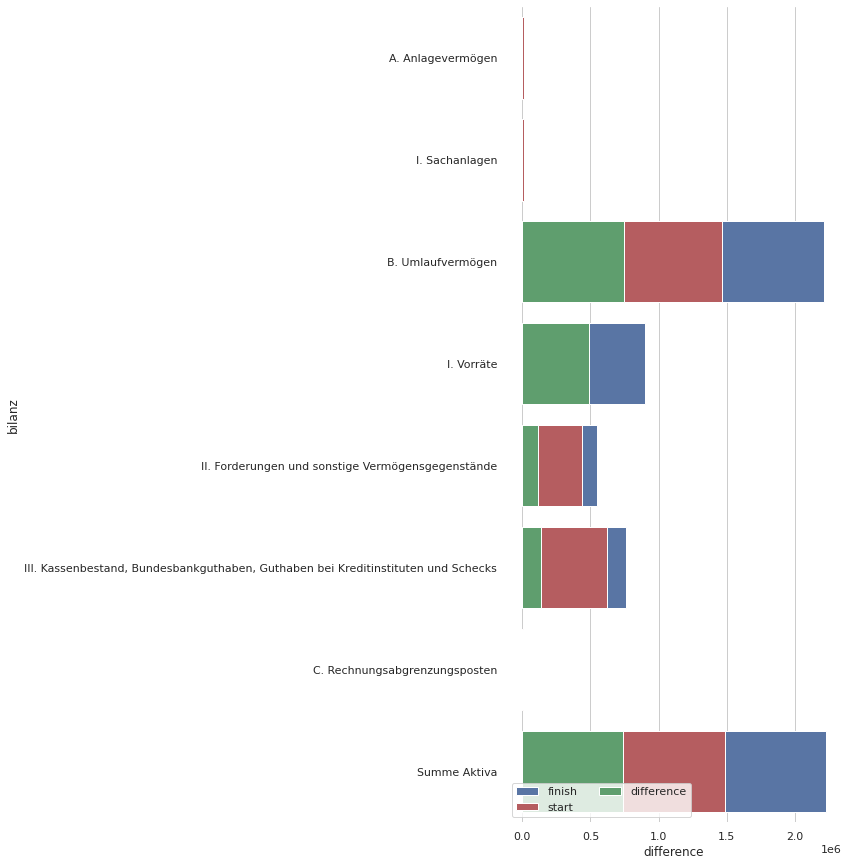

In [ ]:
# Plotting
# Initialize the matplotlib figure
# If necessary. We can log values to flatten plots. 
f, ax = plt.subplots(figsize=(6, 15))
sns.set_theme(style="whitegrid")
sns.barplot(x="finish", y="bilanz", data=Aktiva,
            label="finish", color="b")
sns.barplot(x="start", y="bilanz", data=Aktiva,
            label="start", color="r")
sns.barplot(x="difference", y="bilanz", data=Aktiva,
            label="difference", color="g")
ax.legend(ncol=2, loc="lower left", frameon=True)
sns.despine(left=True, bottom=True)

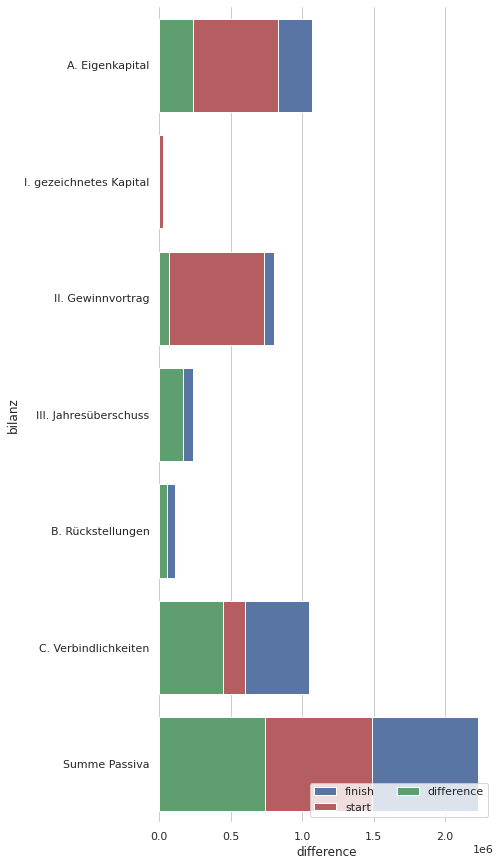

In [ ]:
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x="finish", y="bilanz", data=Passiva,
            label="finish", color="b")
sns.barplot(x="start", y="bilanz", data=Passiva,
            label="start", color="r")
sns.barplot(x="difference", y="bilanz", data=Passiva,
            label="difference", color="g")
ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlim=(10, 24), ylabel="",
#        xlabel="bialanz")
sns.despine(left=True, bottom=True)

##Geschäftsführer

In [ ]:
Aktiva = pd.DataFrame(data[9])
Aktiva.columns = Aktiva.columns.droplevel(0)

In [ ]:
# Aktiva = Aktiva.fillna('ex_nan')

In [ ]:
Aktiva = Aktiva.drop(np.where(Aktiva["EUR"] == 'EUR')[0])

In [ ]:
Aktiva = Aktiva.drop(np.where(Aktiva["EUR"] == '31.12.2012')[0])

In [ ]:
tlist = ['EUR', 'EUR.1', 'TEUR', 'TEUR.1']
for i in tlist:
  Aktiva[i] = Aktiva[i].str.replace('.', '')

In [ ]:
Aktiva[['EUR', 'EUR.1', 'TEUR', 'TEUR.1']] = Aktiva[['EUR', 'EUR.1', 'TEUR', 'TEUR.1']].fillna(0)

In [ ]:
Aktiva['eur_fin'] = Aktiva['EUR'].astype(int) + Aktiva['EUR.1'].astype(int)
Aktiva['eur_st'] = Aktiva['TEUR'].astype(int) + Aktiva['TEUR.1'].astype(int)

In [ ]:
Aktiva = Aktiva.drop(columns=['EUR', 'EUR.1', 'TEUR', 'TEUR.1'], errors='raise')

In [ ]:
mask1 = Aktiva['eur_fin'].values != 0
mask2 = Aktiva['eur_st'].values != 0
Aktiva.loc[mask1, 'eur_fin'] = Aktiva['eur_fin'] / 100
Aktiva.loc[mask2, 'eur_st'] = Aktiva['eur_st'] * 1000

In [ ]:
AKTIVSEITE = Aktiva.iloc[:26].fillna('ex_na')
AKTIVSEITE

,Unnamed: 0_level_1,eur_fin,eur_st
0,A. ANLAGEVERMÖGEN,0.00,0
1,I. Immaterielle Vermögensgegenstände,0.00,0
2,"Entgeltlich erworbene Konzessionen, gewerblich...",63236.00,130000
3,II. Sachanlagen,0.00,0
4,"1. Grundstücke, grundstücksgleiche Rechte und ...",10327179.17,11138000
5,2. Technische Anlagen und Maschinen,1650677.00,1852000
6,"3. Andere Anlagen, Betriebs- und Geschäftsauss...",3215589.00,2111000
7,4. Geleistete Anzahlungen und Anlagen im Bau,1205645.64,739000
8,ex_na,16399090.81,15840000
9,III. Finanzanlagen,0.00,0


In [ ]:
PASSIVSEITE = Aktiva.iloc[27:].reset_index().drop(['index'], 1).fillna('ex_na')
templst = PASSIVSEITE['Unnamed: 0_level_1'].to_list()

In this case we have one non-correct value in 20 row. I tried
 to solve this issue

In [ ]:
PASSIVSEITE.eur_fin.loc[20] = int(templst[-9].split(' ')[4].replace('.', '')\
                                  .replace(',', '')) / 100
PASSIVSEITE.eur_st.loc[20] = int(templst[-9].split(' ')[-2]) * 1000

In [ ]:
#Cleaned df
PASSIVSEITE

,Unnamed: 0_level_1,eur_fin,eur_st
0,A. EIGENKAPITAL,0.00,0
1,I. Gezeichnetes Kapital,30000.00,30000
2,II. Kapitalrücklage,1947865.33,1948000
3,III. Gewinnrücklagen,2939817.86,2940000
4,IV. Gewinnvortrag,2194811.90,892000
5,V. Jahresüberschuss,973719.83,1302000
6,ex_na,8086214.92,7112000
7,B. SONDERPOSTEN AUS ZUWENDUNGEN ZUR FINANZIERU...,5439763.00,5384000
8,C. RÜCKSTELLUNGEN,0.00,0
9,1. Rückstellungen für Pensionen und ähnliche V...,207000.00,207000


##Lübeck

In [ ]:
# generating data
Lübeck = pd.DataFrame(data[11])
Lübeck.columns = Lübeck.columns.droplevel(0)
Lübeck.drop(columns=['Euro', 'Euro.1'], axis=1, inplace=True)
Lübeck

,Unnamed: 0_level_1,Gesamtjahr/Stand Euro,Vorjahr TEuro
0,A. Anlagevermögen,NaN,NaN
1,I. Sachanlagen,1.616.25053,1.5959
2,B. Umlaufvermögen,NaN,NaN
3,I. Forderungen und sonstige Vermögensgegenstände,69.36268,5638.0000
4,"II. Kassenbestand, Bundesbankguthaben, Guthabe...",365.98778,3197.0000
5,C. Rechnungsabgrenzungsposten,1.24536,0.0000
6,Summe Aktiva,2.052.84635,2.4794
7,A. Eigenkapital,NaN,NaN
8,I. Kapitalanteile,38.05815,2542.0000
9,B. Sonderposten mit Rücklageanteil,1.599.57871,1.5996


In [ ]:
Lübeck.describe()

,Vorjahr TEuro
count,10.000000
mean,1764.115430
std,2060.653669
min,0.000000
25%,1.819550
50%,1162.239700
75%,3033.250000
max,5638.000000


In [ ]:
# separate dataframe to 2 parts: Activa and Passiva
Aktiva = Lübeck.loc[:6].fillna(0)
Aktiva

,Unnamed: 0_level_1,Gesamtjahr/Stand Euro,Vorjahr TEuro
0,A. Anlagevermögen,0,0.0000
1,I. Sachanlagen,1.616.25053,1.5959
2,B. Umlaufvermögen,0,0.0000
3,I. Forderungen und sonstige Vermögensgegenstände,69.36268,5638.0000
4,"II. Kassenbestand, Bundesbankguthaben, Guthabe...",365.98778,3197.0000
5,C. Rechnungsabgrenzungsposten,1.24536,0.0000
6,Summe Aktiva,2.052.84635,2.4794


In [ ]:
# Convert data types and solve non-correct values
Aktiva[['Gesamtjahr/Stand Euro', 'Vorjahr TEuro']] = \
Aktiva[['Gesamtjahr/Stand Euro', 'Vorjahr TEuro']]\
.apply(lambda x: x.astype(str).str.replace('.', ''))

Aktiva['Gesamtjahr/Stand Euro'] = pd.to_numeric(Aktiva['Gesamtjahr/Stand Euro'])
Aktiva['Vorjahr TEuro'] = pd.to_numeric(Aktiva['Vorjahr TEuro'])

Aktiva['Gesamtjahr/Stand Euro'] = Aktiva['Gesamtjahr/Stand Euro'] / 100

# At this point, the original value 
# was not correctly recorded and entered into the database.
Aktiva.loc[Aktiva['Gesamtjahr/Stand Euro'] > 1000000, 'Vorjahr TEuro'] *= 100
Aktiva.loc[Aktiva['Gesamtjahr/Stand Euro'] < 1000000, 'Vorjahr TEuro'] *= 10

In [ ]:
# Cleaned Dataset
Aktiva

,Unnamed: 0_level_1,Gesamtjahr/Stand Euro,Vorjahr TEuro
0,A. Anlagevermögen,0.00,0
1,I. Sachanlagen,1616250.53,1595900
2,B. Umlaufvermögen,0.00,0
3,I. Forderungen und sonstige Vermögensgegenstände,69362.68,563800
4,"II. Kassenbestand, Bundesbankguthaben, Guthabe...",365987.78,319700
5,C. Rechnungsabgrenzungsposten,1245.36,0
6,Summe Aktiva,2052846.35,2479400


In [ ]:
Passiva = Lübeck.loc[7:12].fillna(0).reset_index().drop(['index'], axis=1)
Passiva

,Unnamed: 0_level_1,Gesamtjahr/Stand Euro,Vorjahr TEuro
0,A. Eigenkapital,0,0.0000
1,I. Kapitalanteile,38.05815,2542.0000
2,B. Sonderposten mit Rücklageanteil,1.599.57871,1.5996
3,B. Rückstellungen,211.90640,2322.0000
4,C. Verbindlichkeiten,203.30309,3934.0000
5,Summe Passiva,2.052.84635,2.4794


In [ ]:
# Convert data types and solve non-correct values
Passiva[['Gesamtjahr/Stand Euro', 'Vorjahr TEuro']] = \
Passiva[['Gesamtjahr/Stand Euro', 'Vorjahr TEuro']]\
.apply(lambda x: x.astype(str).str.replace('.', ''))

Passiva['Gesamtjahr/Stand Euro'] = pd.to_numeric(Passiva['Gesamtjahr/Stand Euro'])
Passiva['Vorjahr TEuro'] = pd.to_numeric(Passiva['Vorjahr TEuro'])

Passiva['Gesamtjahr/Stand Euro'] = Passiva['Gesamtjahr/Stand Euro'] / 100

# At this point, the original value 
# was not correctly recorded and entered into the database.
Passiva.loc[Passiva['Gesamtjahr/Stand Euro'] > 1000000, 'Vorjahr TEuro'] *= 100
Passiva.loc[Passiva['Gesamtjahr/Stand Euro'] < 1000000, 'Vorjahr TEuro'] *= 10

In [ ]:
# Cleaned Dataset
Passiva

,Unnamed: 0_level_1,Gesamtjahr/Stand Euro,Vorjahr TEuro
0,A. Eigenkapital,0.00,0
1,I. Kapitalanteile,38058.15,254200
2,B. Sonderposten mit Rücklageanteil,1599578.71,1599600
3,B. Rückstellungen,211906.40,232200
4,C. Verbindlichkeiten,203303.09,393400
5,Summe Passiva,2052846.35,2479400
